In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import os

In [10]:
os.environ['KAGGLE_USERNAME'] = 'lalloo'
os.environ['KAGGLE_KEY'] = 'ccf5e7197e4bd09758765d570e438c4c'

In [11]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 201M/207M [00:01<00:00, 110MB/s]
100% 207M/207M [00:01<00:00, 132MB/s]


In [12]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [14]:
main_dir ='/content/New Masks Dataset'
test_dir = os.path.join(main_dir,'Test')
train_dir = os.path.join(main_dir, 'Train')
valid_dir = os.path.join(main_dir,'Validation')


In [21]:
train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [16]:
train_mask_names = os.listdir(train_mask_dir)
train_nomask_names = os.listdir(train_nomask_dir)

In [17]:
print(train_mask_names[:8])

['0243.jpg', '1628.jpg', '1473.jpg', '1518.jpg', '1536.jpg', '0862.jpg', '1523.jpg', '1455.jpg']


In [42]:
import matplotlib.image as mpimg

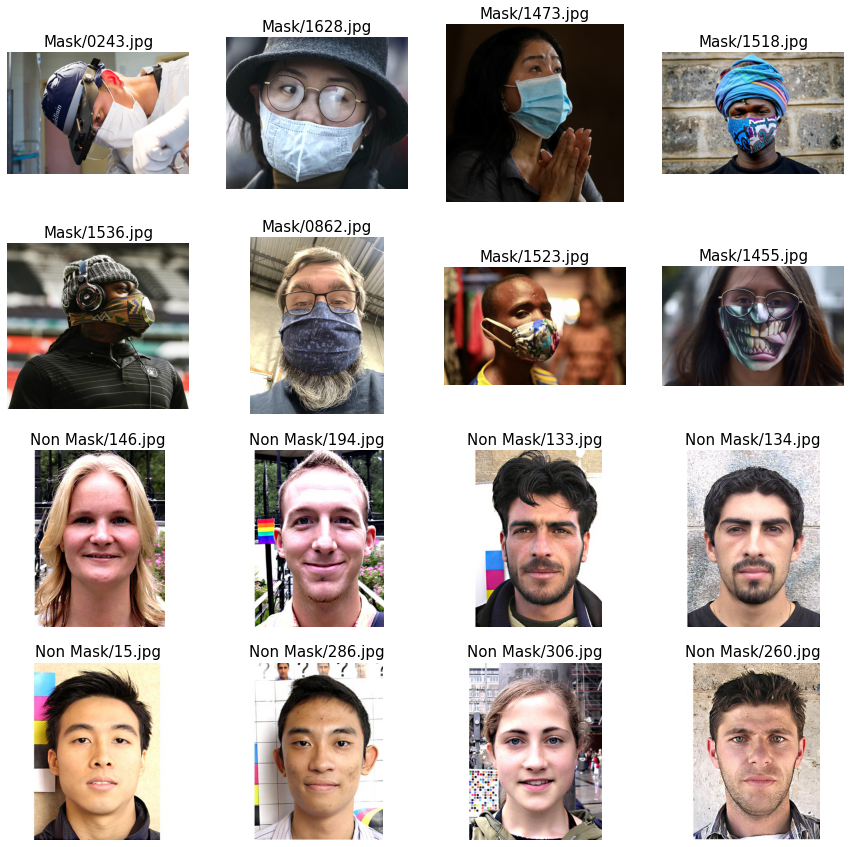

In [59]:
nrows = 4
ncols = 4
plt.figure(figsize=(15,15))

mask_pic = []
for i in train_mask_names[:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic =[]
for i in train_nomask_names[:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

merged_list = mask_pic + nomask_pic

for i in range(0, len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols, i+1)
  sp.axis("Off")
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize=15)
  plt.imshow(image, cmap='gray')

plt.show()

In [27]:
print(mask_pic)

['/content/New Masks Dataset/Train/Mask/0243.jpg', '/content/New Masks Dataset/Train/Mask/1628.jpg', '/content/New Masks Dataset/Train/Mask/1473.jpg', '/content/New Masks Dataset/Train/Mask/1518.jpg', '/content/New Masks Dataset/Train/Mask/1536.jpg', '/content/New Masks Dataset/Train/Mask/0862.jpg', '/content/New Masks Dataset/Train/Mask/1523.jpg', '/content/New Masks Dataset/Train/Mask/1455.jpg', ['0243.jpg', '1628.jpg', '1473.jpg', '1518.jpg', '1536.jpg', '0862.jpg', '1523.jpg', '1455.jpg', '1095.jpg', '1635.jpg', '0614.jpg', '1583.jpg', '0097.png', '0544.jpg', '0559.jpg', '1600.jpg', '0901.jpeg', '1584.jpg', '1136.jpg', '1383.jpg', '1430.jpg', '0913.jpg', '0769.jpg', '0639.jpg', '1110.jpg', '1486.jpg', '0669.jpg', '0802.jpg', '1214.jpg', '0372.jpg', '1530.jpg', '1409.jpg', '0760.jpg', '0837.jpg', '1340.jpg', '0066.jpg', '1669.jpg', '1096.jpg', '1453.jpg', '0211.jpg', '0515.png', '1490.jpg', '0418.jpg', '0772.jpg', '0063.jpg', '0153.jpg', '0655.jpg', '0592.jpg', '0792.jpg', '0733.jpg

In [28]:
print(nomask_pic)

['/content/New Masks Dataset/Train/Non Mask/146.jpg', '/content/New Masks Dataset/Train/Non Mask/194.jpg', '/content/New Masks Dataset/Train/Non Mask/133.jpg', '/content/New Masks Dataset/Train/Non Mask/134.jpg', '/content/New Masks Dataset/Train/Non Mask/15.jpg', '/content/New Masks Dataset/Train/Non Mask/286.jpg', '/content/New Masks Dataset/Train/Non Mask/306.jpg', '/content/New Masks Dataset/Train/Non Mask/260.jpg']


In [63]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 40,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

#create actual generator function using flow from directory

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

valid_generator = val_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [65]:
test_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [66]:
test_generator.image_shape

(150, 150, 3)

In [79]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [81]:
model.compile(optimizer= (Adam(learning_rate=0.001)) , loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
history = model.fit(train_generator, epochs=30, validation_data= valid_generator,)

Epoch 1/30
19/19 [==============================] - 36s 2s/step - loss: 2.8853 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5131
Epoch 2/30
19/19 [==============================] - 35s 2s/step - loss: 0.6595 - accuracy: 0.5833 - val_loss: 0.6827 - val_accuracy: 0.6373
Epoch 3/30
19/19 [==============================] - 34s 2s/step - loss: 0.4960 - accuracy: 0.7800 - val_loss: 0.5838 - val_accuracy: 0.7484
Epoch 4/30
19/19 [==============================] - 35s 2s/step - loss: 0.3448 - accuracy: 0.8583 - val_loss: 0.5092 - val_accuracy: 0.7516
Epoch 5/30
19/19 [==============================] - 35s 2s/step - loss: 0.3527 - accuracy: 0.8650 - val_loss: 0.4674 - val_accuracy: 0.8333
Epoch 6/30
19/19 [==============================] - 35s 2s/step - loss: 0.2848 - accuracy: 0.9017 - val_loss: 0.3147 - val_accuracy: 0.8856
Epoch 7/30
19/19 [==============================] - 35s 2s/step - loss: 0.2599 - accuracy: 0.9050 - val_loss: 0.3259 - val_accuracy: 0.9020
Epoch 8/30
19/19 [==

In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

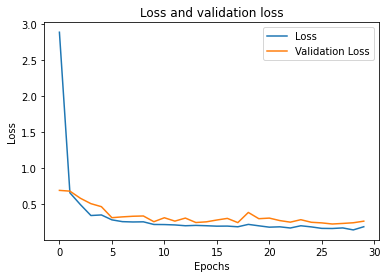

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title("Loss and validation loss")
plt.legend(['Loss','Validation Loss']);

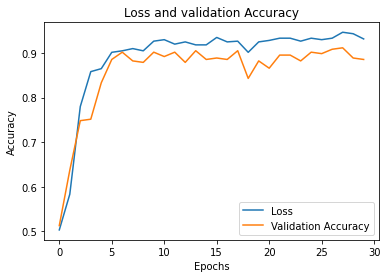

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title("Loss and validation Accuracy")
plt.legend(['Loss','Validation Accuracy']);

In [95]:
test_loss , test_acc = model.evaluate(test_generator)

4/4 [==============================] - 1s 344ms/step - loss: 0.2132 - accuracy: 0.9300


In [99]:
print("Test Loss",test_loss)

Test Loss 0.2132476270198822


In [112]:
print("Test Accuracy",test_acc)

Test Accuracy 0.9300000071525574


In [113]:
if test_acc > 0.92 :
  print( {test_acc,"accuracy.It is performing as expected in excess of 92% accuracy."})
else :
  print("Model requires further tuning")

{0.9300000071525574, 'accuracy.It is performing as expected in excess of 92% accuracy.'}


In [115]:
from google.colab import files
from keras.preprocessing import image


In [122]:
uploaded = files.upload()

for fname in uploaded.keys() :
  img_path = '/content/' + fname
  img = image.load_img(img_path, target_size=(150,150,3))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('mask')
  else : 
    print('no mask')


Saving images.jpg to images.jpg
images.jpg
no mask
